##rohan

In [2]:
#collecting data
!wget https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumour%20data%20set.zip

--2023-05-03 14:37:16--  https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumour%20data%20set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jztol5j7hvm2w96/brain_tumour%20data%20set.zip [following]
--2023-05-03 14:37:16--  https://www.dropbox.com/s/raw/jztol5j7hvm2w96/brain_tumour%20data%20set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc346af8c2ea60272ce1485be53b.dl.dropboxusercontent.com/cd/0/inline/B7XB8sczRte6yWiYDkcvUaZRh2-Tb1eS95FzOX_S0zHpZf6DbrewrRBhhdButJanFYQ9JpzUxC1X-BV5oh0nrdtV18nqjXj3-Ja1xzEDf499TapCyBvb0apGJEY45zTrL41eq4ag2U8TCNXyTsqLcktVa_imLDPbuajHaX8QWd-68Q/file# [following]
--2023-05-03 14:37:17--  https://uc346af8c2ea60272ce1485be53b.dl.dropboxusercontent.com/cd/0/inline/B7XB8sczRte6yWiYDkcvUaZRh2-Tb

In [3]:
!unzip "/content/brain_tumour data set.zip"
!rm "/content/brain_tumour data set.zip"

Archive:  /content/brain_tumour data set.zip
   creating: Brain Tumor Data Set/Brain Tumor/
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1005).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1006).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1007).jpg 

In [4]:
# import os
# import random
# from pathlib import Path

#  # set paths to your image folders
# folder1_path = Path('/content/Brain Tumor Data Set/Brain Tumor')
# folder2_path = Path('/content/Brain Tumor Data Set/Healthey')

# # # get a list of all the image files in each folder
# folder1_images = [f for f in os.listdir(folder1_path) if f.endswith('.jpg')]
# folder2_images = [f for f in os.listdir(folder2_path) if f.endswith('.jpg')]

# # # randomly select a number of images to delete from each folder
# num_to_delete = 400
# folder1_images_to_delete = random.sample(folder1_images, num_to_delete)
# folder2_images_to_delete = random.sample(folder2_images, num_to_delete)

# # # delete the selected images from each folder
# for image in folder1_images_to_delete:
#     image_path = folder1_path / image
#     os.remove(image_path)
    
# for image in folder2_images_to_delete:
#     image_path = folder2_path / image
#     os.remove(image_path)


In [5]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [6]:
#counting the number of images in respective classes, 0 - Yes and 1 - No
ROOT_DIR = "/content/Brain Tumor Data Set"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]= len(os.listdir(os.path.join(ROOT_DIR, dir)))

  


In [7]:
number_of_images.items()

dict_items([('Brain Tumor', 2113), ('Healthey', 1687)])

**splitting the data such that**



*   70% for train data
*   15% for validation
*   15% for testing





In [8]:
os.listdir("/content/Brain Tumor Data Set")

['Brain Tumor', 'Healthey']

In [9]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import splitfolders
input_folder = '/content/Brain Tumor Data Set'
splitfolders.ratio(input_folder, output="dataset",
                   seed=42,ratio=(.7, .15, .15),
                   group_prefix=None)

Copying files: 3800 files [00:00, 5989.12 files/s]


In [11]:
import keras
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator


##sarita

In [12]:
#CNN Model

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3) ))

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units=64, activation = 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [13]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [14]:
from keras.applications.mobilenet import MobileNet, preprocess_input

In [15]:
def preprocessingImages1(path):
  """
  input : Path
  output : Pre processed images
  """

  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1/255, horizontal_flip =  True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [16]:
path = "/content/dataset/train"
train_data = preprocessingImages1(path)

Found 2659 images belonging to 2 classes.


In [17]:
def preprocessingImages2(path):
  """
  input : Path
  output : Pre processed images
  """

  image_data = ImageDataGenerator( preprocessing_function = preprocess_input )
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [18]:
path = "/content/dataset/test" 
test_data = preprocessingImages2(path)

Found 572 images belonging to 2 classes.


In [19]:
path = "/content/dataset/val" 
val_data = preprocessingImages2(path)

Found 569 images belonging to 2 classes.


In [21]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

In [22]:
#early stopping

es =EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 5, verbose = 1, mode = 'auto')

#model check point
mc = ModelCheckpoint(monitor = "val_accuracy", filepath = "./bestmodel.h5", verbose = 1, save_best_only = True)
 
cd = [es,mc]

**Model training**

##omkar

In [23]:
from keras.layers import Flatten, Dense
from  keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input
import keras

In [24]:
base_model = MobileNet(input_shape = (224,224,3), include_top = False)

17225924/17225924 [==============================] - 0s 0us/step


In [25]:
for layer in base_model.layers:
  layer.trainable = False

In [26]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [27]:
X = Flatten()(base_model.output)
X = Dense(units = 1, activation = 'sigmoid')(X)

model = Model(base_model.input, X)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [29]:
model.compile(optimizer = 'rmsprop', loss= keras.losses.binary_crossentropy, metrics =['accuracy']  )

In [30]:
#call back
from keras.callbacks import ModelCheckpoint , EarlyStopping

#early stopping

es =EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 10, verbose = 1, mode = 'auto')

#model check point
mc = ModelCheckpoint(monitor = "val_accuracy", filepath = "./bestmodel.h5", verbose = 1, save_best_only = True)
 
cb = [es,mc]



In [31]:
hist = model.fit_generator (train_data,
                            steps_per_epoch=15, 
                            epochs=20, 
                            validation_data= val_data,
                            validation_steps = 16, 
                            callbacks=cb)

Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 4.1958 - accuracy: 0.7354
Epoch 1: val_accuracy improved from -inf to 0.58789, saving model to ./bestmodel.h5
15/15 [==============================] - 18s 597ms/step - loss: 4.1958 - accuracy: 0.7354 - val_loss: 3.8549 - val_accuracy: 0.5879
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 1.6533 - accuracy: 0.8315
Epoch 2: val_accuracy improved from 0.58789 to 0.94727, saving model to ./bestmodel.h5
15/15 [==============================] - 8s 558ms/step - loss: 1.6533 - accuracy: 0.8315 - val_loss: 0.2517 - val_accuracy: 0.9473
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 1.5368 - accuracy: 0.8049
Epoch 3: val_accuracy did not improve from 0.94727
15/15 [==============================] - 9s 579ms/step - loss: 1.5368 - accuracy: 0.8049 - val_loss: 0.3320 - val_accuracy: 0.9395
Epoch 4/20
15/15 [==============================] - ETA: 0s - loss: 1.0991 - accuracy: 0.8625
Epoch 4:

In [32]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

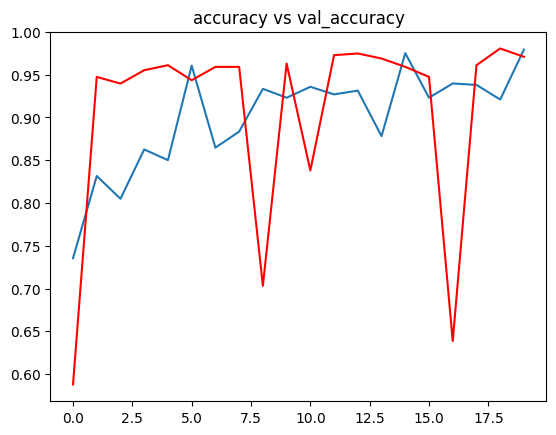

In [33]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")

plt.title("accuracy vs val_accuracy")
plt.show()

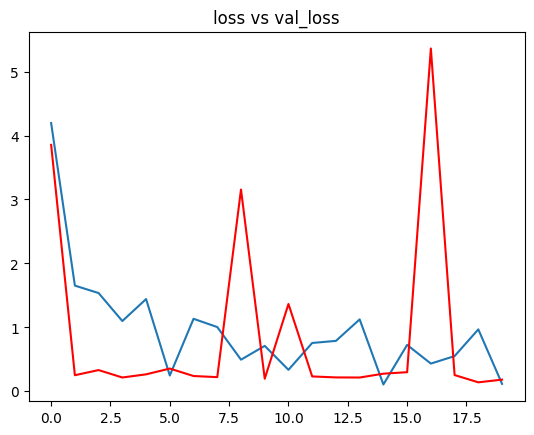

In [34]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")

plt.title("loss vs val_loss")
plt.show()


In [35]:
#Model Accuracy

from keras.models import load_model

model = load_model("/content/bestmodel.h5")

**Model Accuracy**

In [36]:
acc = model.evaluate_generator(test_data)[1]
print(f"The accuracy our model is {acc*100} %")

The accuracy our model is 96.85314893722534 %


In [37]:
from tensorflow.keras.utils import load_img, img_to_array


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}

##mayoor

In [41]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 67.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 

In [42]:
from PIL import Image
import numpy as np
import gradio as gr
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('/content/bestmodel.h5')

def predict_image(image):
    # Open image using PIL
    image = Image.fromarray(np.uint8(image))

    # Resize image using PIL
    image = image.resize((224, 224))

    # Convert image to numpy array
    input_arr = np.array(image) / 255

    # Expand the shape of the array to match the input shape of the model
    input_arr = np.expand_dims(input_arr, axis=0)

    # Make prediction using the model
    pred = model.predict(input_arr)[0][0]

    # Return prediction result
    if pred == 1:
        return "The MRI is a healthy one"
    else:
        return "The MRI has a tumor"


# Create a Gradio interface for the predict_image function
gr_interface = gr.Interface(
    predict_image, 
    inputs="image", 
    outputs="text",
    title="Brain Tumor Detector",
    description="Upload an MRI scan of the brain to determine whether or not it contains a tumor.",
    )

# Show the interface
gr_interface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>